In [ ]:
# Load Data

In [1]:
import pandas as pd

data = pd.read_csv('TelcoCustomer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Regular Expression

In [3]:
import pandas as pd
import re

data = pd.read_csv( 'TelcoCustomer-Churn.csv')

data['PhoneNumber'] = ['123-456-7890'] * len(data)

phone_pattern = re.compile(r'\d{3}-\d{3}-\d{4}')

data['ExtractedPhoneNumbers'] = data['PhoneNumber'].apply(lambda x: phone_pattern.findall(x))

data[['PhoneNumber', 'ExtractedPhoneNumbers']]


,PhoneNumber,ExtractedPhoneNumbers
0,123-456-7890,[123-456-7890]
1,123-456-7890,[123-456-7890]
2,123-456-7890,[123-456-7890]
3,123-456-7890,[123-456-7890]
4,123-456-7890,[123-456-7890]
...,...,...
7038,123-456-7890,[123-456-7890]
7039,123-456-7890,[123-456-7890]
7040,123-456-7890,[123-456-7890]
7041,123-456-7890,[123-456-7890]


In [8]:
import re
customer_id_pattern = re.compile(r'\d+')
data['ExtractedCustomerIDs'] = data['customerID'].apply(lambda x: customer_id_pattern.findall(x) if pd.notnull(x) else [])

data[['customerID', 'ExtractedCustomerIDs']]


,customerID,ExtractedCustomerIDs
0,7590-VHVEG,[7590]
1,5575-GNVDE,[5575]
2,3668-QPYBK,[3668]
3,7795-CFOCW,[7795]
4,9237-HQITU,[9237]
...,...,...
7038,6840-RESVB,[6840]
7039,2234-XADUH,[2234]
7040,4801-JZAZL,[4801]
7041,8361-LTMKD,[8361]


In [ ]:
# Data Cleaning & Preprocessing

In [ ]:
# Missing Values

In [5]:
import pandas as pd
data = pd.read_csv('TelcoCustomer-Churn.csv')
missing_values = data.isnull().sum()
print(missing_values)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Remove Duplicates

In [3]:
import pandas as pd
df = pd.read_csv('TelcoCustomer-Churn.csv')

duplicates = df.duplicated()
print(duplicates.sum())

df.drop_duplicates(inplace=True)


0


In [4]:
import pandas as pd
df = pd.read_csv('TelcoCustomer-Churn.csv')

df_cleaned = df.drop_duplicates(subset='customerID', keep='first')

df_cleaned.to_csv('cleaned_dataset.csv', index=False)

print("Duplicates have been removed and the cleaned dataset is saved as 'cleaned_dataset.csv'.")


Duplicates have been removed and the cleaned dataset is saved as 'cleaned_dataset.csv'.


In [8]:
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv')

duplicates = df[df.duplicated(subset='customerID', keep=False)]
print("Duplicates:")
print(duplicates)

Duplicates:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [24]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Handling Outliers

In [9]:
import pandas as pd

df = pd.read_csv('TelcoCustomer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df = df.dropna(subset=['TotalCharges'])

duplicates = df[df.duplicated(subset='customerID', keep=False)]
print("Duplicates:")
print(duplicates)

def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

columns_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in columns_to_check:
    outliers = find_outliers(column)
    print(f"Outliers in {column}:")
    print(outliers)

duplicates.to_csv('duplicates.csv', index=False)
for column in columns_to_check:
    outliers = find_outliers(column)
    outliers.to_csv(f'outliers_{column}.csv', index=False)


Duplicates:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Outliers in tenure:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Outliers in MonthlyCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, Payme

In [ ]:
# Encoding Categorical Variables

In [21]:
import pandas as pd

df = pd.read_csv('TelcoCustomer-Churn.csv')

categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
print(df_encoded.head())


   customerID  SeniorCitizen  tenure  MonthlyCharges TotalCharges Churn  \
0  7590-VHVEG              0       1           29.85        29.85    No   
1  5575-GNVDE              0      34           56.95       1889.5    No   
2  3668-QPYBK              0       2           53.85       108.15   Yes   
3  7795-CFOCW              0      45           42.30      1840.75    No   
4  9237-HQITU              0       2           70.70       151.65   Yes   

   gender_Female  gender_Male  Partner_No  Partner_Yes  ...  \
0           True        False       False         True  ...   
1          False         True        True        False  ...   
2          False         True        True        False  ...   
3          False         True        True        False  ...   
4           True        False        True        False  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False        

In [2]:
# Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
print(df_encoded[numerical_columns].describe())


       SeniorCitizen        tenure  MonthlyCharges
count   7.043000e+03  7.043000e+03    7.043000e+03
mean   -4.842546e-17  8.827558e-17    3.329250e-17
std     1.000071e+00  1.000071e+00    1.000071e+00
min    -4.399165e-01 -1.318165e+00   -1.545860e+00
25%    -4.399165e-01 -9.516817e-01   -9.725399e-01
50%    -4.399165e-01 -1.372744e-01    1.857327e-01
75%    -4.399165e-01  9.214551e-01    8.338335e-01
max     2.273159e+00  1.613701e+00    1.794352e+00


In [18]:
# Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
print(df_encoded[numerical_columns].describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147     0.449599        0.462803
std         0.368612     0.341104        0.299403
min         0.000000     0.000000        0.000000
25%         0.000000     0.125000        0.171642
50%         0.000000     0.402778        0.518408
75%         0.000000     0.763889        0.712438
max         1.000000     1.000000        1.000000


In [ ]:
# Mean,Median,Standard Deviation

In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv('TelcoCustomer-Churn.csv')

numeric_df = df.select_dtypes(include=[np.number])

mean_values = numeric_df.mean()
median_values = numeric_df.median()
std_values = numeric_df.std()

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Standard Deviation:\n", std_values)


Mean Values:
 SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64
Median Values:
 SeniorCitizen      0.00
tenure            29.00
MonthlyCharges    70.35
dtype: float64
Standard Deviation:
 SeniorCitizen      0.368612
tenure            24.559481
MonthlyCharges    30.090047
dtype: float64


In [ ]:
# Slicing and Indexing

In [27]:
gender_column = df['gender']
print(gender_column.head())

selected_columns = df[['gender', 'MonthlyCharges', 'TotalCharges']]
print(selected_columns.head())

first_five_rows = df.head()
print(first_five_rows)

slice_df = df.loc[0:10, ['gender', 'MonthlyCharges']]
print(slice_df)


0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object
   gender  MonthlyCharges TotalCharges
0  Female           29.85        29.85
1    Male           56.95       1889.5
2    Male           53.85       108.15
3    Male           42.30      1840.75
4  Female           70.70       151.65
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL          

In [ ]:
# Reshaping

In [28]:
gender_column = df['gender']
print(gender_column.head())

selected_columns = df[['gender', 'MonthlyCharges', 'TotalCharges']]
print(selected_columns.head())

first_five_rows = df.head()
print(first_five_rows)

slice_df = df.loc[0:10, ['gender', 'MonthlyCharges']]
print(slice_df)

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object
   gender  MonthlyCharges TotalCharges
0  Female           29.85        29.85
1    Male           56.95       1889.5
2    Male           53.85       108.15
3    Male           42.30      1840.75
4  Female           70.70       151.65
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL          

In [ ]:
# Grouping

In [29]:
grouped = df.groupby('gender')['MonthlyCharges'].mean()
print(grouped)

gender
Female    65.204243
Male      64.327482
Name: MonthlyCharges, dtype: float64


In [ ]:
# Unvariate Analysis

In [ ]:
# Histogram

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


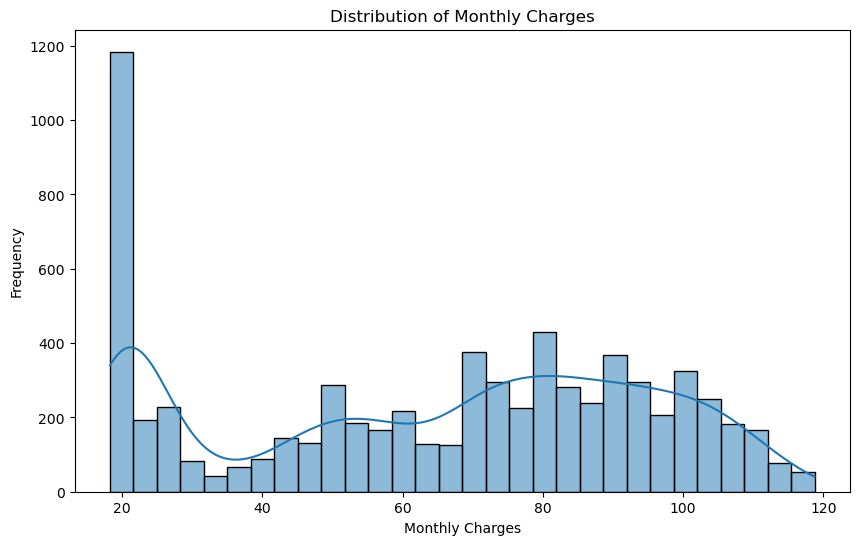

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Boxplot

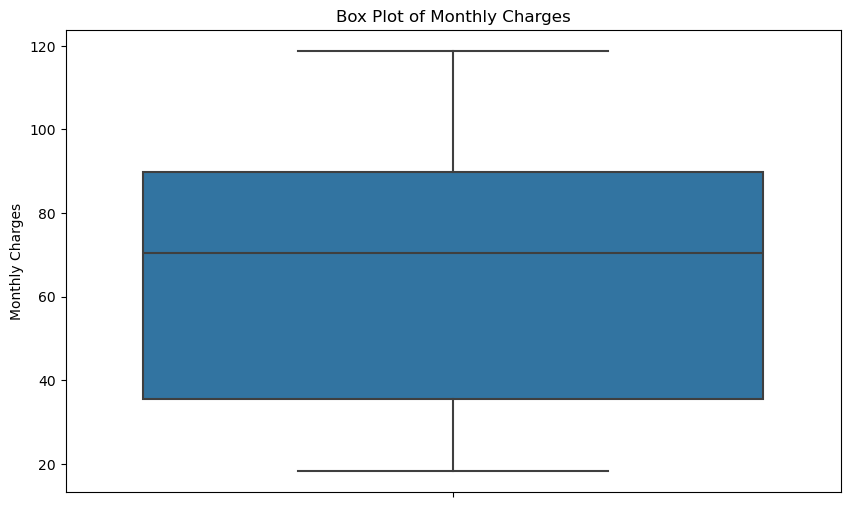

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['MonthlyCharges'])
plt.title('Box Plot of Monthly Charges')
plt.ylabel('Monthly Charges')
plt.show()

In [ ]:
# Bivariate Analysis

In [ ]:
# Scatter Plot

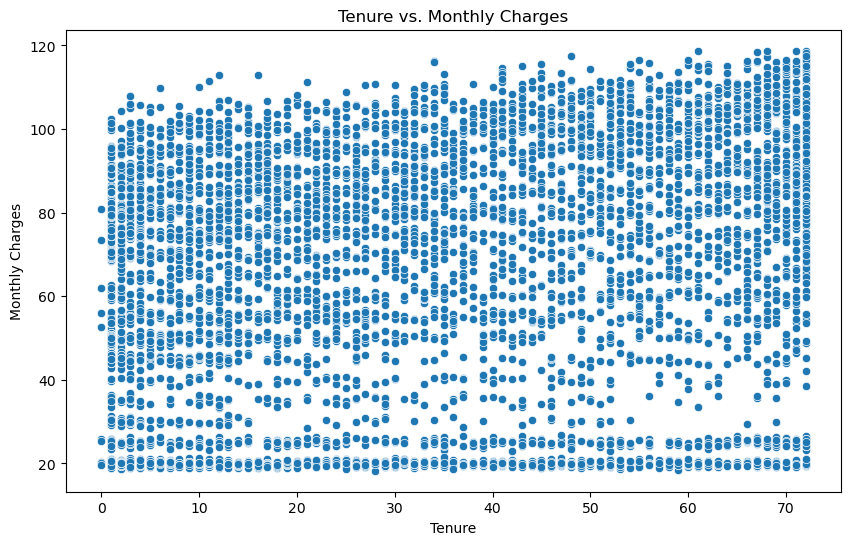

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('TelcoCustomer-Churn.csv')

plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)
plt.title('Tenure vs. Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

In [ ]:
# Multivariate Analysis

In [ ]:
# Pair Plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


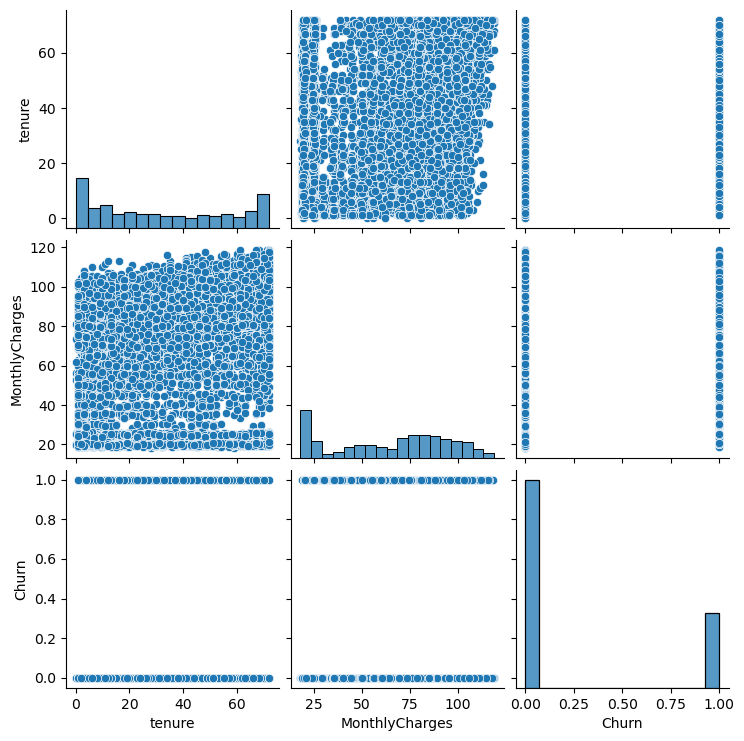

In [43]:
import seaborn as sns

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

selected_columns = ['tenure', 'MonthlyCharges', 'Churn']
df_selected = df[selected_columns].dropna()

sns.pairplot(df_selected)
plt.show()


In [ ]:
# Merging

In [48]:
import pandas as pd

df = pd.read_csv('TelcoCustomer-Churn.csv')

additional_info = ['Info1', 'Info2', 'Info3', 'Info4'] * (len(df) // 4 + 1)
df_additional = pd.DataFrame({
    'customerID': df['customerID'],  # Matching the length of 'df'
    'AdditionalInfo': additional_info[:len(df)]  # Ensure the length is exactly the same as 'df'
})

merged_df = pd.merge(df, df_additional, on='customerID', how='left')
print("Merged DataFrame:\n", merged_df.head())

Merged DataFrame:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0      

In [ ]:
# Concatenation

In [49]:
df_to_concat = pd.DataFrame({
    'ExtraFeature1': range(len(df)),
    'ExtraFeature2': range(len(df))
})

concat_df = pd.concat([df, df_to_concat], axis=1)
print("Concatenated DataFrame:\n", concat_df.head())

Concatenated DataFrame:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              Pay

In [ ]:
# Pivoting

In [50]:
import pandas as pd

df = pd.read_csv('TelcoCustomer-Churn.csv')

pivot_df = df.pivot_table(values='MonthlyCharges', index='Contract', columns='gender', aggfunc='mean')
print("Pivot Table:\n", pivot_df)


Pivot Table:
 gender             Female       Male
Contract                            
Month-to-month  66.652623  66.147615
One year        66.841643  63.343444
Two year        60.513373  61.025941


In [ ]:
# Reshaping

In [51]:
melted_df = pd.melt(df, id_vars=['customerID', 'Contract'], value_vars=['MonthlyCharges', 'TotalCharges'], var_name='ChargesType', value_name='ChargesAmount')
print("Melted DataFrame:\n", melted_df.head())

Melted DataFrame:
    customerID        Contract     ChargesType ChargesAmount
0  7590-VHVEG  Month-to-month  MonthlyCharges         29.85
1  5575-GNVDE        One year  MonthlyCharges         56.95
2  3668-QPYBK  Month-to-month  MonthlyCharges         53.85
3  7795-CFOCW        One year  MonthlyCharges          42.3
4  9237-HQITU  Month-to-month  MonthlyCharges          70.7


In [ ]:
# Usage of groupby for Aggregations

In [52]:
import pandas as pd

df = pd.read_csv('TelcoCustomer-Churn.csv')

grouped_df = df.groupby(['Contract', 'gender'])['MonthlyCharges'].mean().reset_index()
print("Grouped DataFrame:\n", grouped_df)

Grouped DataFrame:
          Contract  gender  MonthlyCharges
0  Month-to-month  Female       66.652623
1  Month-to-month    Male       66.147615
2        One year  Female       66.841643
3        One year    Male       63.343444
4        Two year  Female       60.513373
5        Two year    Male       61.025941


In [ ]:
# Usage of crosstab for Aggregations

In [53]:
crosstab_df = pd.crosstab(df['Contract'], df['gender'])
print("Crosstab DataFrame:\n", crosstab_df)

Crosstab DataFrame:
 gender          Female  Male
Contract                    
Month-to-month    1925  1950
One year           718   755
Two year           845   850


In [ ]:
# Binning

In [54]:
import pandas as pd

df = pd.read_csv('TelcoCustomer-Churn.csv')

bins = [0, 12, 24, 48, 60, 72]
labels = ['0-1 year', '1-2 years', '2-4 years', '4-5 years', '5-6 years']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

print("Binned Tenure Group:\n", df[['tenure', 'TenureGroup']].head())

Binned Tenure Group:
    tenure TenureGroup
0       1    0-1 year
1      34   2-4 years
2       2    0-1 year
3      45   2-4 years
4       2    0-1 year


In [ ]:
# Encoding

In [ ]:
# Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

print("Label Encoded 'Churn' Column:\n", df[['Churn']].head())

Label Encoded 'Churn' Column:
    Churn
0      0
1      0
2      1
3      0
4      1


In [ ]:
# Standardization

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])

print("Standardized 'MonthlyCharges':\n", df[['MonthlyCharges']].head())

Standardized 'MonthlyCharges':
    MonthlyCharges
0       -1.160323
1       -0.259629
2       -0.362660
3       -0.746535
4        0.197365


In [ ]:
# Visualizations

In [ ]:
# Distribution of Monthly Charges with Churn Annotations

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


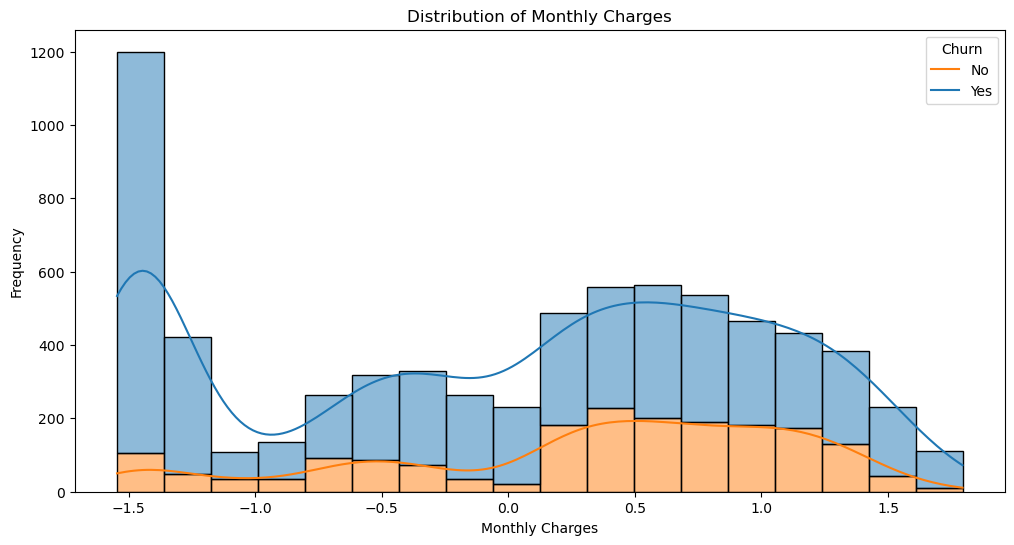

In [57]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.annotate('High churn', xy=(80, 400), xytext=(85, 450),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

In [ ]:
# Scatter Plot of Tenure vs. Monthly Charges Colored by Churn

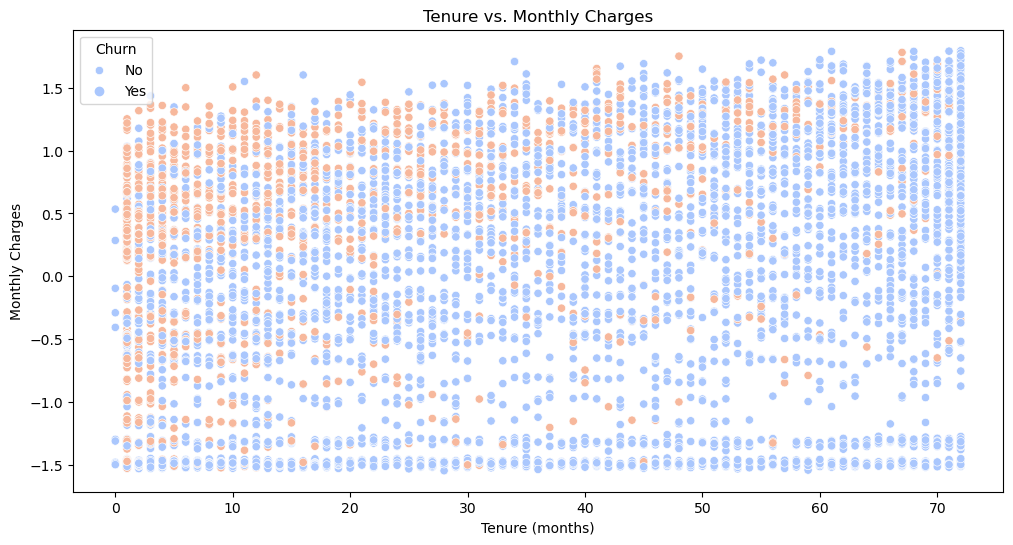

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='coolwarm')
plt.title('Tenure vs. Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.annotate('Possible target', xy=(10, 100), xytext=(15, 120),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.show()

In [ ]:
# Pair Plot to Show Relationships Between Variables

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


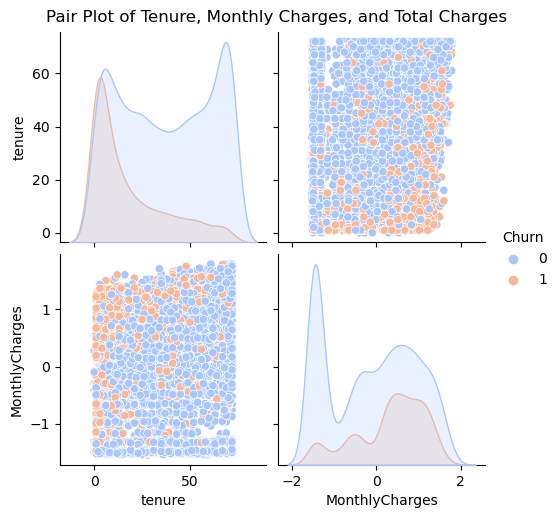

In [59]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='coolwarm')
plt.suptitle('Pair Plot of Tenure, Monthly Charges, and Total Charges', y=1.02)
plt.show()